In [1]:
from pathlib import Path
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# テストデータにない野菜を訓練データから除去
kinds = test_df['kind'].unique()
train_df = train_df[train_df['kind'].isin(kinds)]

vis_df = train_df.copy()
# vis_df = vis_df.query('20181101 <= date <= 20221031').reset_index(drop=True)
vis_df = vis_df.query('20160101 <= date <= 20211231').reset_index(drop=True)
vis_df = pd.pivot_table(vis_df, index='date', columns='kind', values='mode_price').reset_index()
vis_df.head()

kind,date,かぼちゃ,きゅうり,さといも,たまねぎ,だいこん,なましいたけ,にんじん,ねぎ,はくさい,ほうれんそう,キャベツ,トマト,ピーマン,ミニトマト,レタス
0,20160105,NaN,1620.0,4104.0,1512.0,648.0,194.0,1404.0,3024.0,864.0,97.0,432.0,1512.0,86.25,210.5,2700.0
1,20160106,NaN,1620.0,4104.0,2160.0,594.0,173.0,1404.0,1512.0,918.0,86.5,432.0,1620.0,81.00,173.0,3024.0
2,20160107,NaN,1728.0,3780.0,2160.0,648.0,173.0,648.0,1620.0,810.0,86.5,432.0,1620.0,91.50,167.5,3348.0
3,20160108,NaN,1836.0,3915.0,2160.0,486.0,173.0,972.0,3024.0,972.0,86.5,432.0,1620.0,91.50,167.5,3456.0
4,20160109,NaN,1836.0,3672.0,2160.0,432.0,173.0,1296.0,1728.0,918.0,81.0,864.0,1620.0,86.00,194.5,3456.0


In [3]:
vis_df = vis_df.copy()
vis_df['year'] = vis_df['date']//10000
vis_df['month'] = vis_df['date'].apply(lambda x: int(str(x)[4:6]))
vis_df.index = pd.to_datetime(vis_df['date'], format='%Y%m%d')
vis_df = vis_df.drop(columns='date')
vis_df_month = vis_df.groupby(['year', 'month']).mean()

vis_df_month.index = ['_'.join([str(x) for x in idx]) for idx in  vis_df_month.index.values]
vis_df_month = vis_df_month.fillna(0)
vis_df_month

kind,かぼちゃ,きゅうり,さといも,たまねぎ,だいこん,なましいたけ,にんじん,ねぎ,はくさい,ほうれんそう,キャベツ,トマト,ピーマン,ミニトマト,レタス
2016_1,0.000000,2316.600000,3087.450000,2008.800000,604.800000,172.900000,936.225000,1722.600000,955.800000,111.825000,669.600000,1890.000000,98.000000,184.975000,2797.200000
2016_2,0.000000,2273.142857,3479.142857,1887.428571,900.000000,181.238095,1068.428571,1517.142857,1144.285714,110.738095,709.714286,1774.285714,123.071429,211.904762,2967.428571
2016_3,3845.739130,1723.304348,3573.391304,1610.608696,1044.782609,167.739130,1206.782609,1742.086957,1580.086957,117.217391,995.478261,1976.869565,105.739130,213.413043,2582.608696
2016_4,4289.318182,1315.636364,0.000000,1627.363636,1072.636364,159.772727,1691.181818,2133.000000,1470.272727,107.454545,1207.636364,1610.181818,73.363636,156.318182,1865.454545
2016_5,1661.142857,1249.714286,0.000000,2100.857143,972.000000,159.952381,2008.285714,2489.142857,984.857143,88.190476,1018.285714,1234.285714,65.416667,126.630952,1483.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_8,1738.800000,1765.800000,0.000000,2959.200000,958.500000,0.000000,1145.475000,1115.100000,1225.800000,165.700000,869.400000,1323.000000,69.700000,123.875000,1368.900000
2021_9,1486.350000,1976.400000,3849.882353,3078.000000,1090.800000,113.625000,940.950000,1532.250000,2143.800000,167.950000,1144.800000,2008.800000,84.900000,211.450000,2748.600000
2021_10,1350.000000,1497.272727,3107.454545,3465.818182,945.000000,112.977273,697.704545,1485.000000,866.454545,101.500000,800.181818,1580.727273,57.363636,137.500000,1098.409091
2021_11,1514.454545,1512.000000,2577.272727,4899.272727,648.000000,106.500000,967.090909,967.090909,589.090909,76.090909,687.272727,2160.000000,61.295455,144.068182,1281.272727


かぼちゃ


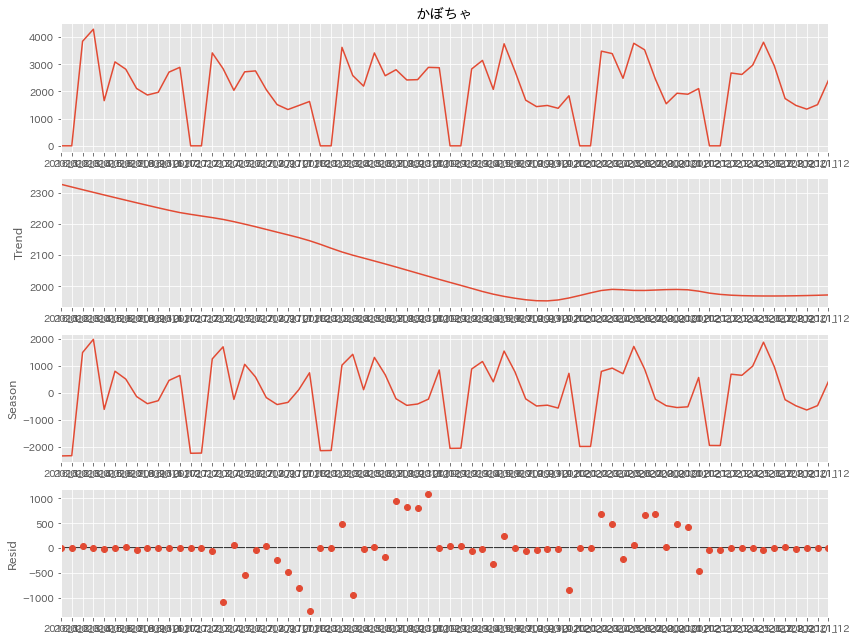

きゅうり


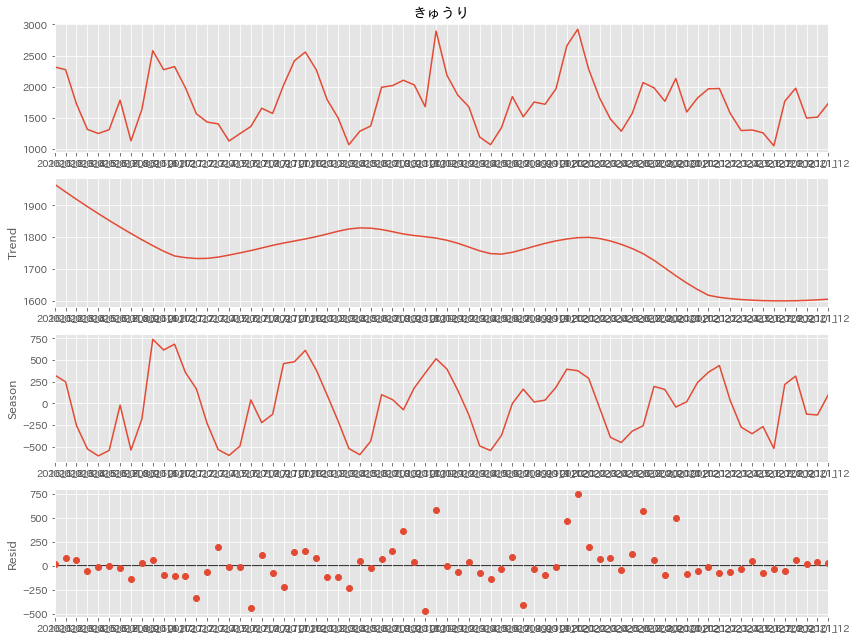

さといも


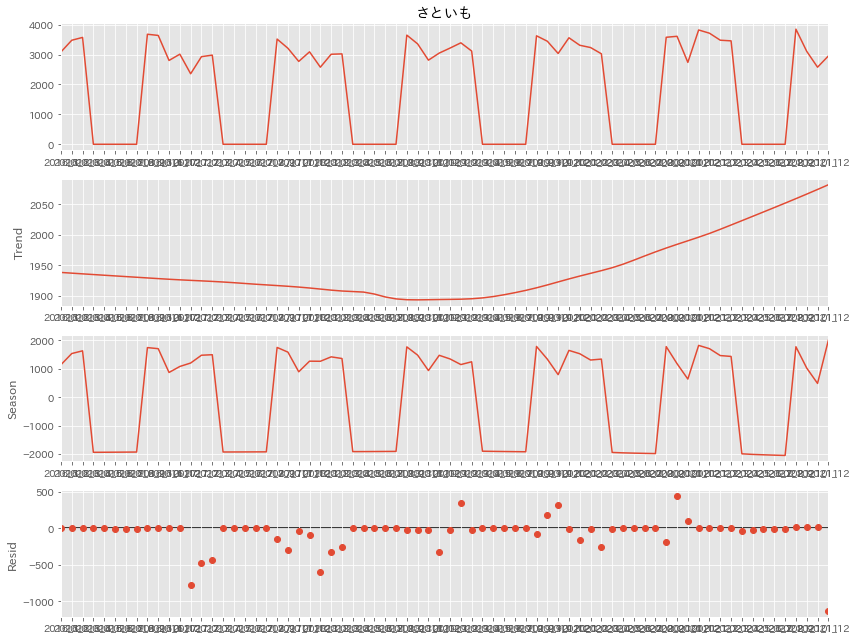

たまねぎ


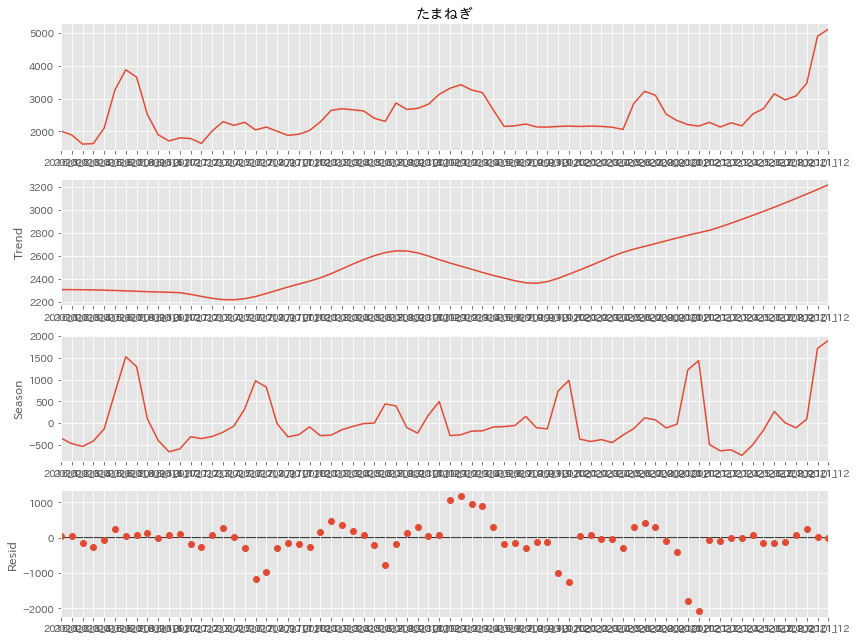

だいこん


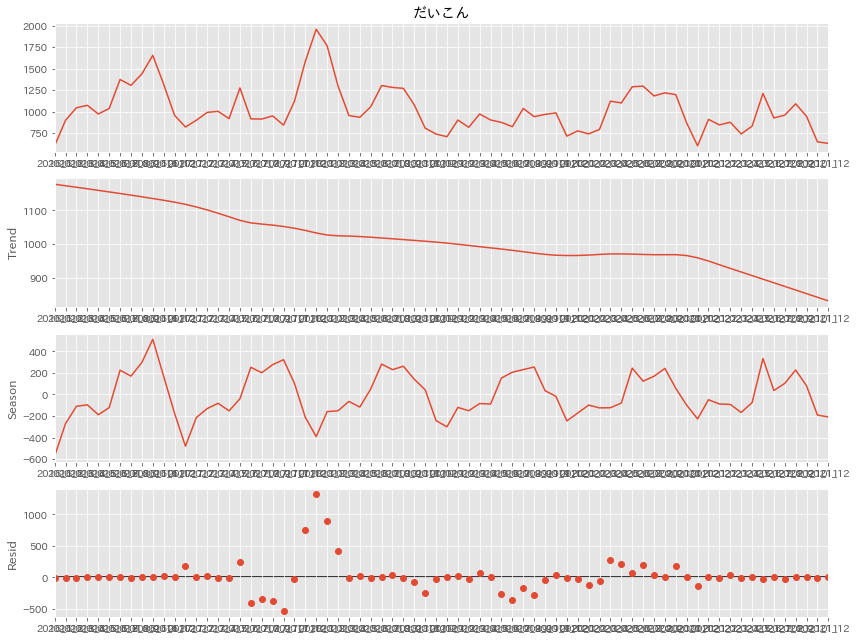

なましいたけ


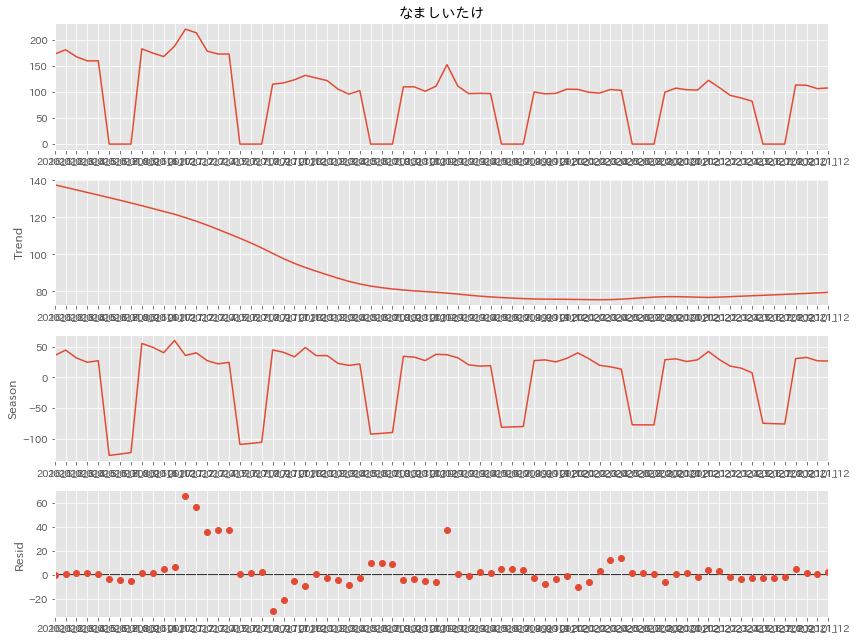

にんじん


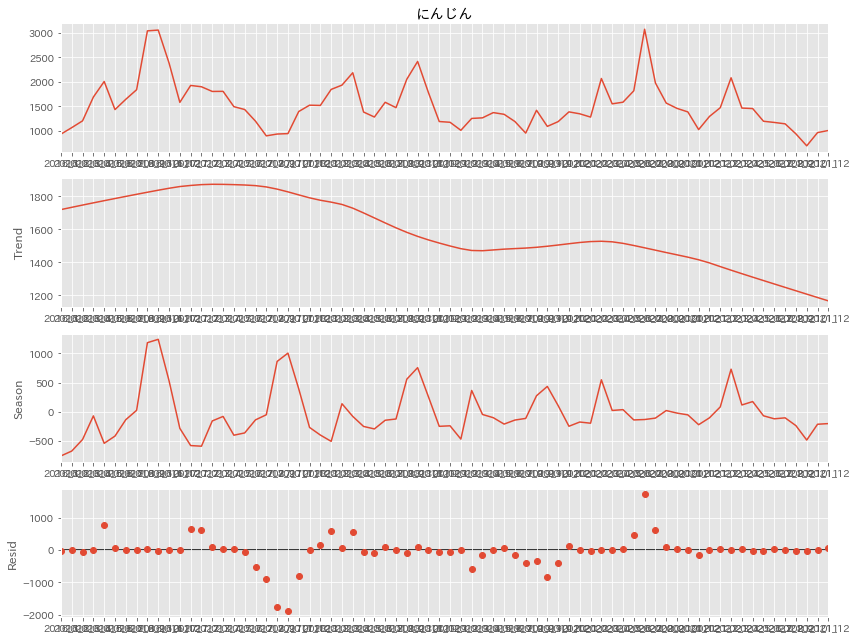

ねぎ


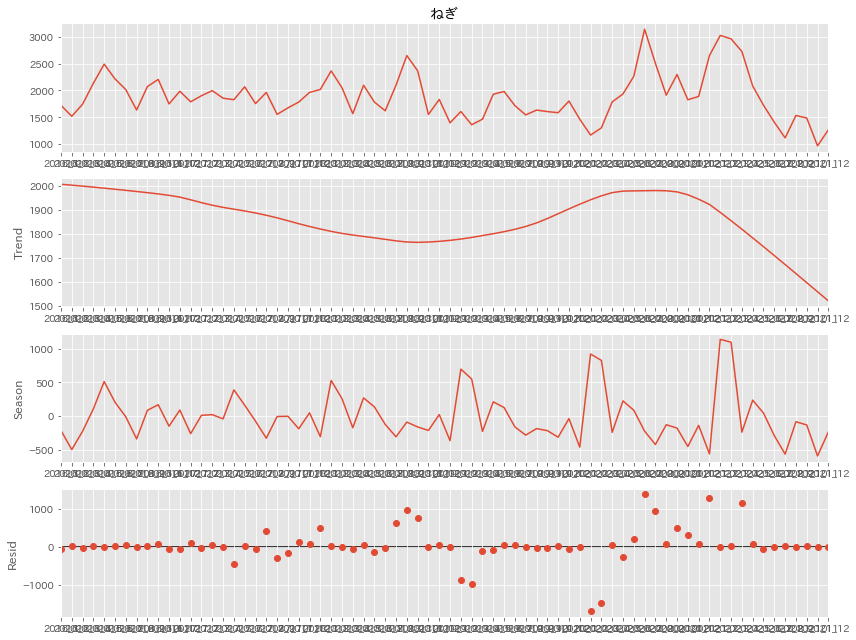

はくさい


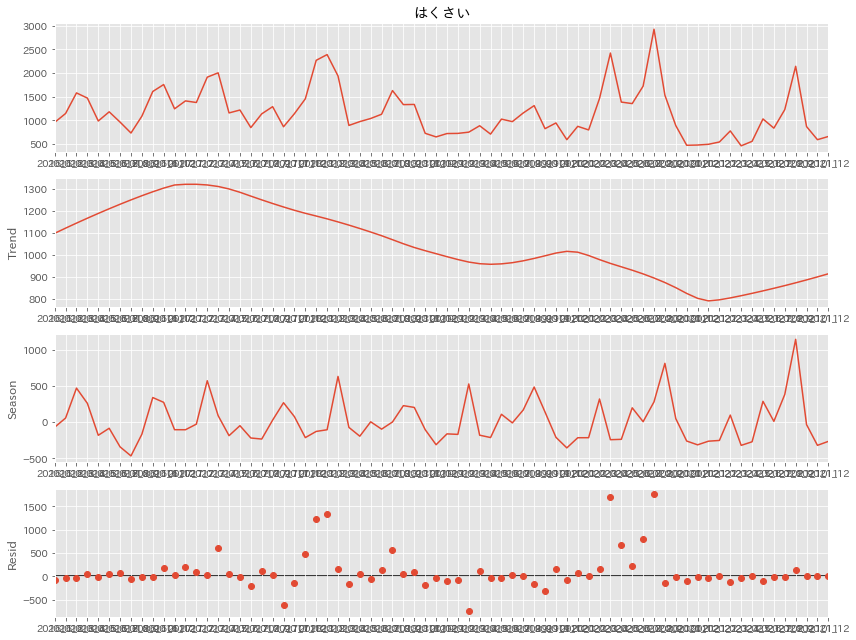

ほうれんそう


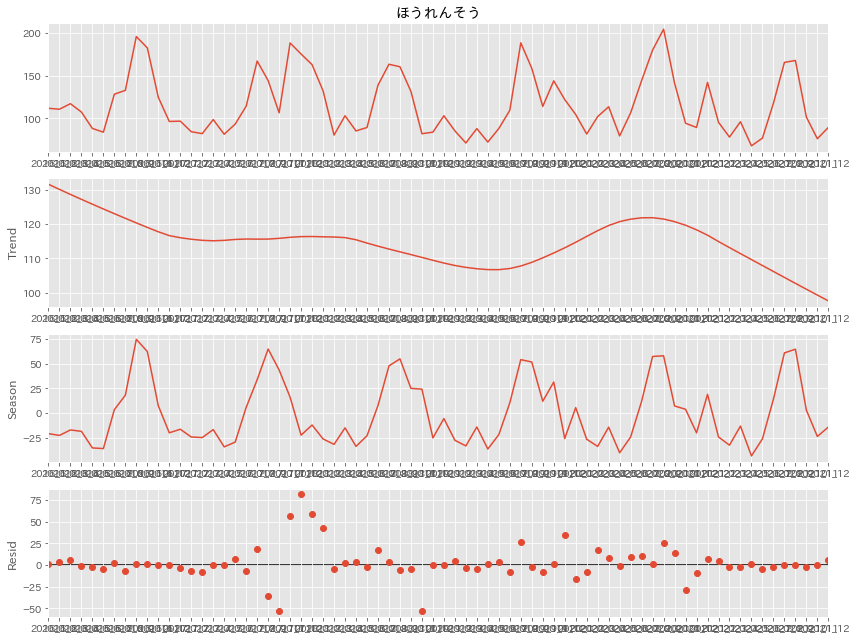

キャベツ


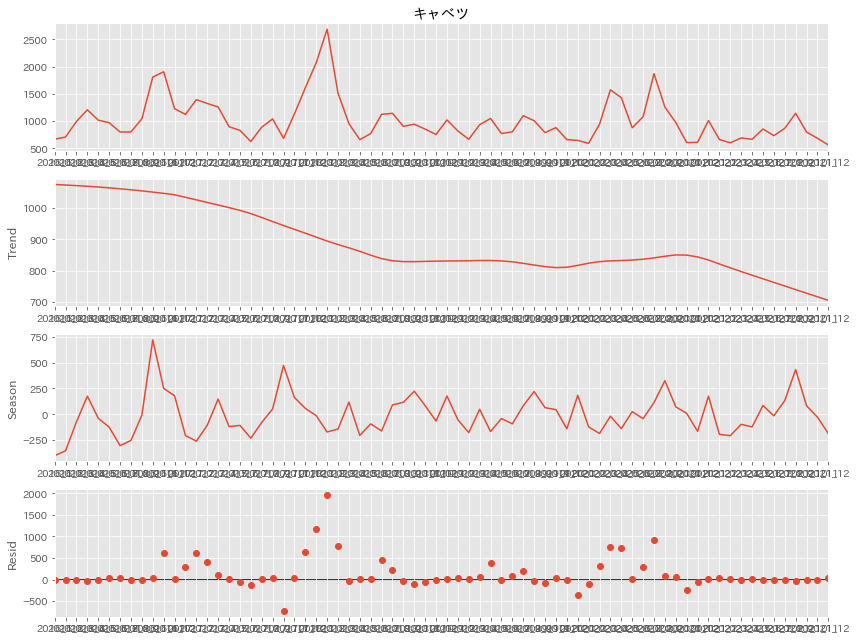

トマト


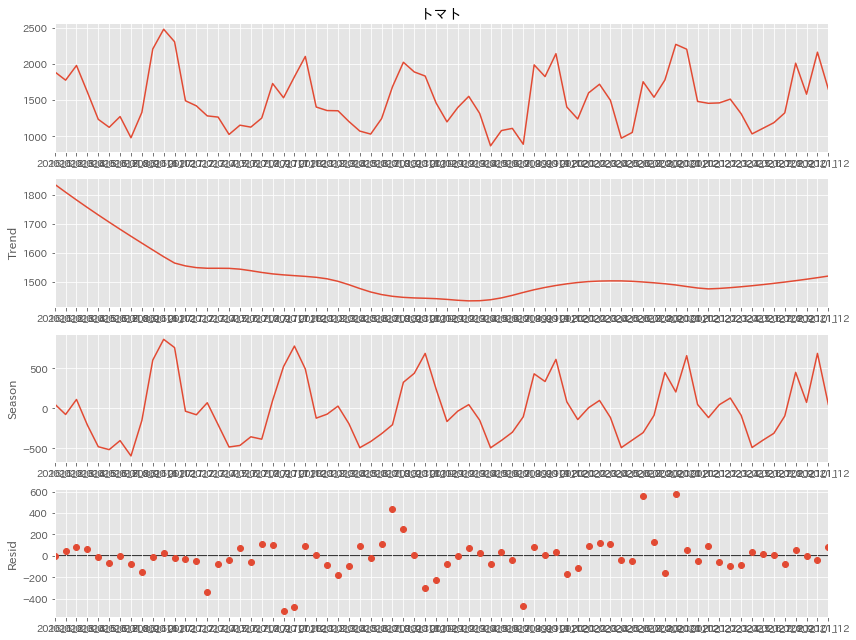

ピーマン


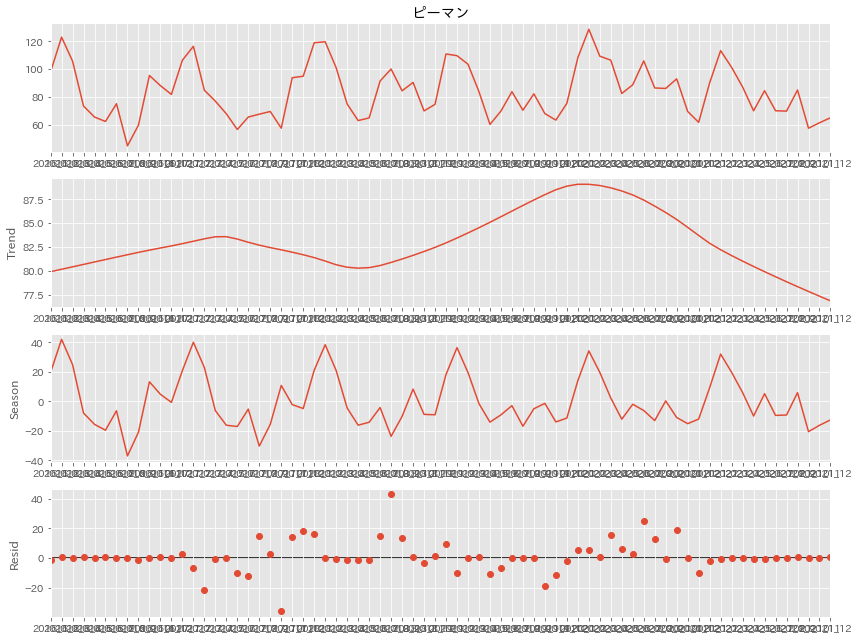

ミニトマト


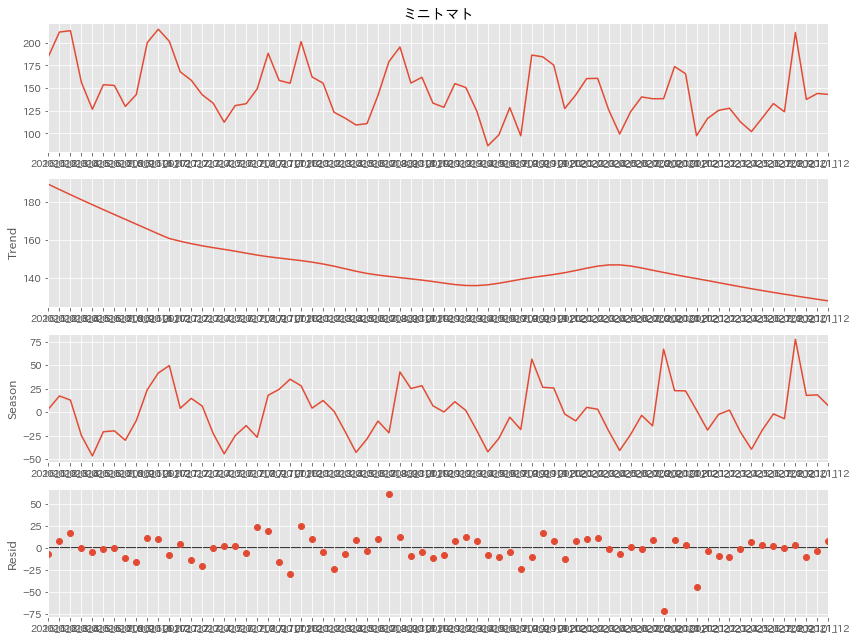

レタス


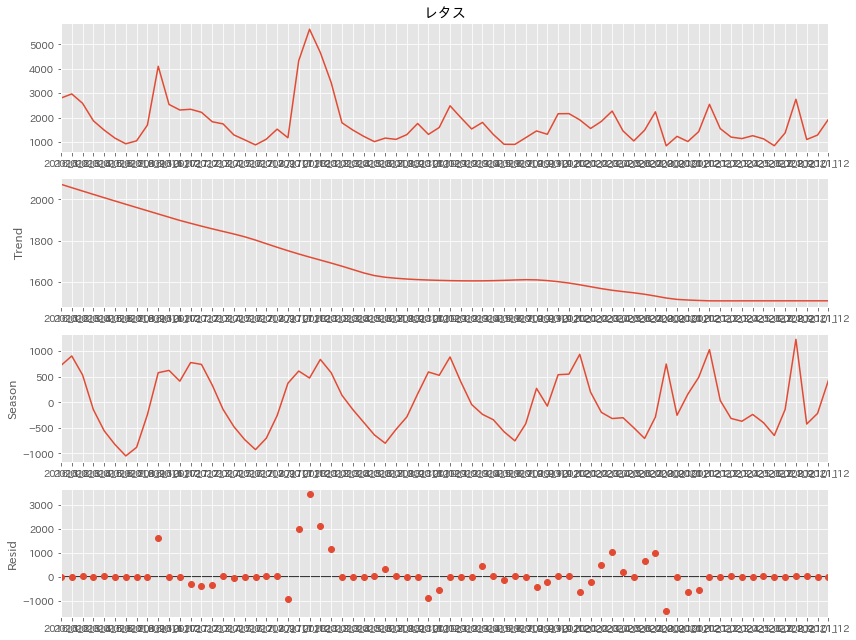

In [4]:
from statsmodels.tsa.seasonal import STL 

# df = df.query("year == 2017 or year == 2018" )
for col in vis_df_month.columns:
    print(col)
    #STL分解
    stl=STL(vis_df_month[col], period=12, robust=True)
    # stl=STL(df[col], period=365, robust=True)

    stl_series = stl.fit()

    # STL分解結果のグラフ化
    stl_series.plot()
    plt.show()

#     # STL分解結果のデータ
#     stl_o = stl_series.observed #観測データ（STL分解前の元のデータ）＝トレンド＋季節性＋残差
#     stl_t = stl_series.trend    #トレンド（trend）
#     stl_s = stl_series.seasonal #季節性（seasonal）
#     stl_r = stl_series.resid    #残差（resid）

#     stl_t.plot()                                       #トレンド（trend）のグラフ描写
#     stl_s.plot()                                       #季節性（season）のグラフ描写
#     stl_r.plot()                                       #残差（resid）のグラフ描写
#     plt.title('Passengers')                            #グラフタイトル
#     plt.ylabel('Monthly Number of Airline Passengers') #タテ軸のラベル
#     plt.xlabel('Month')                                #ヨコ軸のラベル
#     plt.legend()                                       #凡例表示
    plt.show()